In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
plt.style.use("ggplot")

# Part A

### Exercise 1

In [2]:
lst = [24,25,26,27,28,21,22,23,24,25]

In [3]:
def selection_sort(lst):
    for i in range(len(lst)):
        min_index = i
        for j in range(i+1, len(lst)):
            if lst[min_index] > lst[j]:
                min_index = j
        lst[i], lst[min_index] = lst[min_index], lst[i]

In [4]:
selection_sort(lst)
lst

[21, 22, 23, 24, 24, 25, 25, 26, 27, 28]

In [5]:
def search(lst, left, right, x):
    if right >= left:
        middle = (left + right) // 2
        if lst[middle] == x:
            return middle
        elif lst[middle] < x:
            return search(lst, middle+1, right, x)
        else:
            return search(lst, left, middle-1, x)
    else:
        return -1

### Exercise 2

In [6]:
search(lst, 0, len(lst)-1, 28)

9

### Exercise 3

In [7]:
def get_diff(lst):
    arr = np.array([lst])
    return np.sum((arr-arr.mean())**2)

### Exercise 4

In [8]:
get_diff(lst)

42.5

# Part B

### Exercise 1

In [9]:
try:
    df = pd.read_excel("salary.xlsx")
    print("Loaded")
except:
    print("Error")

Loaded


In [10]:
df

,age,marital-status,relationship,gender,hours-per-week,country,salary
0,26,Married-civ-spouse,Wife,Female,40,United-States,<=50K
1,40,Married-civ-spouse,Husband,Male,45,United-States,>50K
2,34,Married-civ-spouse,Husband,Male,40,United-States,<=50K
3,17,Never-married,Own-child,Male,40,United-States,<=50K
4,75,Married-civ-spouse,Husband,Male,5,United-States,<=50K
...,...,...,...,...,...,...,...
14995,30,Married-civ-spouse,Husband,Male,85,United-States,<=50K
14996,50,Married-civ-spouse,Husband,Male,40,United-States,>50K
14997,59,Divorced,Unmarried,Male,45,United-States,>50K
14998,38,Never-married,Not-in-family,Female,40,United-States,<=50K


### Exercise 2

In [11]:
df[df["gender"]=="Female"].mean().head(1)

C:\Users\Nadav Fireman\AppData\Local\Temp\ipykernel_6076\1920364074.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["gender"]=="Female"].mean().head(1)


age    37.090727
dtype: float64

### Exercise 3

In [12]:
df["gender"].replace(to_replace=" Male" , value="Male" , inplace=True)

In [13]:
temp = df[(df["gender"]=="Male") & (df["age"]>30)]

In [14]:
temp.groupby("country")["gender"].count().sort_values().tail(1)

country
 United-States    6373
Name: gender, dtype: int64

### Exercise 4

In [15]:
df.groupby("relationship")["gender"].value_counts()

relationship     gender
 Husband         Male      6001
 Not-in-family   Male      2070
                 Female    1839
 Other-relative  Male       243
                 Female     188
 Own-child       Male      1315
                 Female    1016
 Unmarried       Female    1221
                 Male       367
 Wife            Female     740
Name: gender, dtype: int64

### Exercise 5

In [16]:
df[df["salary"]=="<=50K"]["marital-status"].value_counts()

 Never-married            4708
 Married-civ-spouse       3832
 Divorced                 1815
 Separated                 460
 Widowed                   442
 Married-spouse-absent     188
 Married-AF-spouse           7
Name: marital-status, dtype: int64

### Exercise 6

In [17]:
df_female = df[df["gender"]=="Female"]

In [18]:
df_female.rename(columns= {"hours-per-week" : "hours-per-week-female"}, inplace=True)

C:\Users\Nadav Fireman\AppData\Local\Temp\ipykernel_6076\1367648172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female.rename(columns= {"hours-per-week" : "hours-per-week-female"}, inplace=True)


In [19]:
data_female = df_female.groupby("country")[["hours-per-week-female"]].mean()

In [20]:
df_male = df[df["gender"]=="Male"]

In [21]:
df_male.rename(columns= {"hours-per-week" : "hours-per-week-male"}, inplace=True)

C:\Users\Nadav Fireman\AppData\Local\Temp\ipykernel_6076\1285618079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male.rename(columns= {"hours-per-week" : "hours-per-week-male"}, inplace=True)


In [22]:
data_male = df_male.groupby("country")[["hours-per-week-male"]].mean()

In [23]:
data_female["hours-per-week-male"] = data_male["hours-per-week-male"]

In [24]:
data_female

,hours-per-week-female,hours-per-week-male
country,,
Cambodia,40.000000,40.777778
Canada,34.533333,40.024390
China,38.214286,38.906250
Columbia,37.875000,39.294118
Cuba,34.500000,42.809524
Dominican-Republic,40.400000,47.652174
Ecuador,29.500000,40.875000
El-Salvador,36.916667,37.031250
England,44.235294,41.066667


### Exercise 7

In [25]:
df.replace(to_replace=" >50K" , value=">50K" , inplace=True)

In [26]:
df[df["salary"]==">50K"]["relationship"].value_counts().head(1)

 Husband    2647
Name: relationship, dtype: int64

### Exercise 8

##### Section a

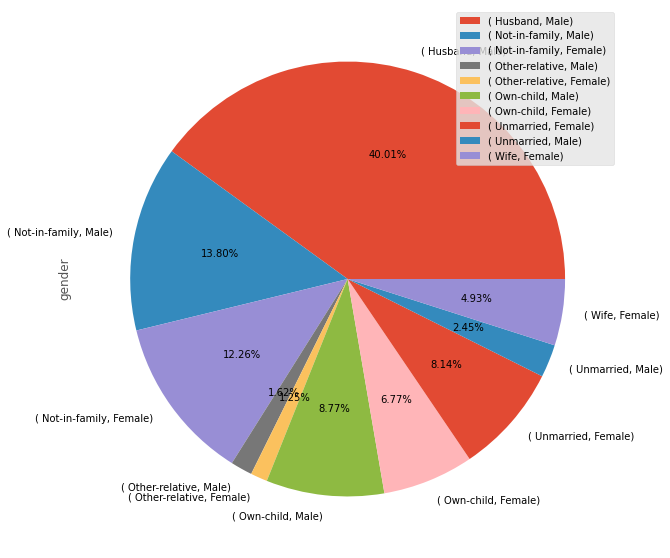

In [27]:
df.groupby("relationship")["gender"].value_counts().plot.pie(autopct="%1.2f%%",figsize=(10,10))
plt.legend()
plt.show()

##### Section b

<AxesSubplot:xlabel='country'>

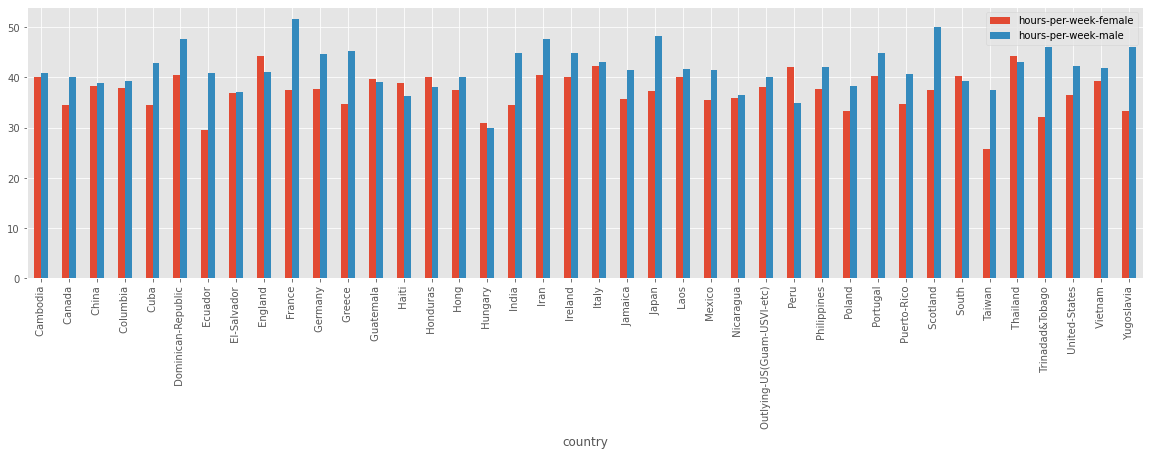

In [28]:
data_female.plot(kind="bar",figsize=(20,5))

# Part C

### Exercise 1

In [29]:
df.isna().sum()

age                 0
marital-status      0
relationship        0
gender              0
hours-per-week      0
country           254
salary              0
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
df.isna().sum()

age               0
marital-status    0
relationship      0
gender            0
hours-per-week    0
country           0
salary            0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14746 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14746 non-null  int64 
 1   marital-status  14746 non-null  object
 2   relationship    14746 non-null  object
 3   gender          14746 non-null  object
 4   hours-per-week  14746 non-null  int64 
 5   country         14746 non-null  object
 6   salary          14746 non-null  object
dtypes: int64(2), object(5)
memory usage: 921.6+ KB


### Exercise 2

##### Section a+b+c

In [33]:
df.mean()

C:\Users\Nadav Fireman\AppData\Local\Temp\ipykernel_6076\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age               38.604639
hours-per-week    40.357521
dtype: float64

In [34]:
df.std()

C:\Users\Nadav Fireman\AppData\Local\Temp\ipykernel_6076\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


age               13.724206
hours-per-week    12.441579
dtype: float64

In [35]:
numerical_cols=df.select_dtypes(exclude=['object']).columns
for col in numerical_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

In [36]:
df

,age,marital-status,relationship,gender,hours-per-week,country,salary
0,-0.918424,Married-civ-spouse,Wife,Female,-0.028736,United-States,<=50K
1,0.101672,Married-civ-spouse,Husband,Male,0.373142,United-States,>50K
2,-0.335512,Married-civ-spouse,Husband,Male,-0.028736,United-States,<=50K
3,-1.574200,Never-married,Own-child,Male,-0.028736,United-States,<=50K
4,2.651910,Married-civ-spouse,Husband,Male,-2.841884,United-States,<=50K
...,...,...,...,...,...,...,...
14995,-0.626968,Married-civ-spouse,Husband,Male,3.588168,United-States,<=50K
14996,0.830311,Married-civ-spouse,Husband,Male,-0.028736,United-States,>50K
14997,1.486087,Divorced,Unmarried,Male,0.373142,United-States,>50K
14998,-0.044056,Never-married,Not-in-family,Female,-0.028736,United-States,<=50K


### Exercise 3

In [37]:
df.drop(columns=["salary"] , inplace=True)

In [38]:
df

,age,marital-status,relationship,gender,hours-per-week,country
0,-0.918424,Married-civ-spouse,Wife,Female,-0.028736,United-States
1,0.101672,Married-civ-spouse,Husband,Male,0.373142,United-States
2,-0.335512,Married-civ-spouse,Husband,Male,-0.028736,United-States
3,-1.574200,Never-married,Own-child,Male,-0.028736,United-States
4,2.651910,Married-civ-spouse,Husband,Male,-2.841884,United-States
...,...,...,...,...,...,...
14995,-0.626968,Married-civ-spouse,Husband,Male,3.588168,United-States
14996,0.830311,Married-civ-spouse,Husband,Male,-0.028736,United-States
14997,1.486087,Divorced,Unmarried,Male,0.373142,United-States
14998,-0.044056,Never-married,Not-in-family,Female,-0.028736,United-States


### Exercise 4

In [39]:
df.replace(to_replace=["Male","Female"],value=[0,1],inplace=True)

In [40]:
df

,age,marital-status,relationship,gender,hours-per-week,country
0,-0.918424,Married-civ-spouse,Wife,1,-0.028736,United-States
1,0.101672,Married-civ-spouse,Husband,0,0.373142,United-States
2,-0.335512,Married-civ-spouse,Husband,0,-0.028736,United-States
3,-1.574200,Never-married,Own-child,0,-0.028736,United-States
4,2.651910,Married-civ-spouse,Husband,0,-2.841884,United-States
...,...,...,...,...,...,...
14995,-0.626968,Married-civ-spouse,Husband,0,3.588168,United-States
14996,0.830311,Married-civ-spouse,Husband,0,-0.028736,United-States
14997,1.486087,Divorced,Unmarried,0,0.373142,United-States
14998,-0.044056,Never-married,Not-in-family,1,-0.028736,United-States


In [41]:
dummy_data = pd.get_dummies(df)
dummy_data

,age,gender,hours-per-week,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,-0.918424,1,-0.028736,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.101672,0,0.373142,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.335512,0,-0.028736,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.574200,0,-0.028736,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.651910,0,-2.841884,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.626968,0,3.588168,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14996,0.830311,0,-0.028736,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,1.486087,0,0.373142,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14998,-0.044056,1,-0.028736,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Exercise 5

In [42]:
dummy_data.select_dtypes(exclude=['float64']).columns

Index(['gender', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'country_ Cambodia', 'country_ Canada',
       'country_ China', 'country_ Columbia', 'country_ Cuba',
       'country_ Dominican-Republic', 'country_ Ecuador',
       'country_ El-Salvador', 'country_ England', 'country_ France',
       'country_ Germany', 'country_ Greece', 'country_ Guatemala',
       'country_ Haiti', 'country_ Honduras', 'country_ Hong',
       'country_ Hungary', 'country_ India', 'country_ Iran',
       'country_ Ireland', 'country_ Italy', 'country_ Jamaica',
       'country_ Japan', 'country_ Laos',

In [43]:
normalized_data = dummy_data[['gender', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'country_ Cambodia', 'country_ Canada',
       'country_ China', 'country_ Columbia', 'country_ Cuba',
       'country_ Dominican-Republic', 'country_ Ecuador',
       'country_ El-Salvador', 'country_ England', 'country_ France',
       'country_ Germany', 'country_ Greece', 'country_ Guatemala',
       'country_ Haiti', 'country_ Honduras', 'country_ Hong',
       'country_ Hungary', 'country_ India', 'country_ Iran',
       'country_ Ireland', 'country_ Italy', 'country_ Jamaica',
       'country_ Japan', 'country_ Laos', 'country_ Mexico',
       'country_ Nicaragua', 'country_ Outlying-US(Guam-USVI-etc)',
       'country_ Peru', 'country_ Philippines', 'country_ Poland',
       'country_ Portugal', 'country_ Puerto-Rico', 'country_ Scotland',
       'country_ South', 'country_ Taiwan', 'country_ Thailand',
       'country_ Trinadad&Tobago', 'country_ United-States',
       'country_ Vietnam', 'country_ Yugoslavia']].copy()

In [44]:
normalized_data

,gender,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14996,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14998,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Part D

### Exercise 1

##### Section a

In [45]:
def get_kmeans_accuracy(data, top_k):
    sum_squared = []
    silhouette = []
    K = range(2, top_k)
    for i in K:
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(data)
        sum_squared.append(kmeans.inertia_) # errors
        silhouette.append(silhouette_score(data, kmeans.labels_))
    return pd.DataFrame({
    "K": K,
    "SSE": sum_squared,
    "SIL": silhouette
  })

In [46]:
dummy_result = get_kmeans_accuracy(normalized_data, 8)
dummy_result

,K,SSE,SIL
0,2,16426.310435,0.463160
1,3,12994.231269,0.514268
2,4,11048.815528,0.538550
3,5,9116.618220,0.591388
4,6,7706.518579,0.619123
5,7,7083.821831,0.628399


In [47]:
dummy_result.set_index("K", inplace=True)

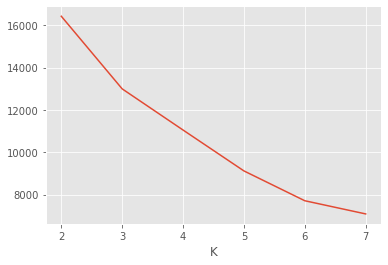

In [48]:
dummy_result["SSE"].plot()
plt.show()

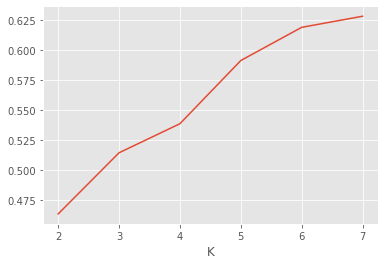

In [49]:
dummy_result["SIL"].plot()
plt.show()

In [50]:
dummy_kmeans = KMeans(n_clusters = 6, init = 'k-means++')
dummy_kmeans.fit(normalized_data)

KMeans(n_clusters=6)

##### Section b

In [51]:
normalized_result = get_kmeans_accuracy(normalized_data, 8)
normalized_result

,K,SSE,SIL
0,2,16426.310435,0.463160
1,3,13158.087791,0.502740
2,4,11056.096984,0.537053
3,5,9116.618220,0.591388
4,6,7833.038542,0.612288
5,7,7042.659498,0.631000


In [52]:
normalized_result.set_index("K", inplace=True)

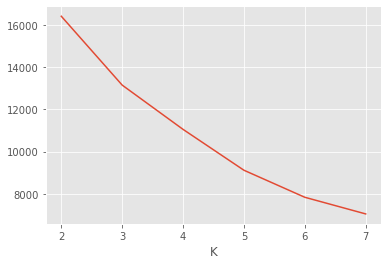

In [53]:
normalized_result["SSE"].plot()
plt.show()

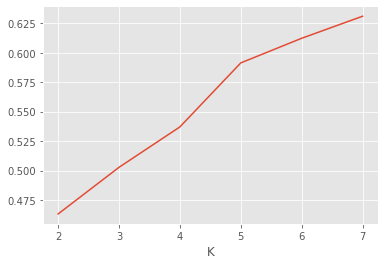

In [54]:
normalized_result["SIL"].plot()
plt.show()

In [55]:
normalized_kmeans = KMeans(n_clusters = 6, init = 'k-means++')
normalized_kmeans.fit(normalized_data)

KMeans(n_clusters=6)

### Exercise 2

In [56]:
metrics.silhouette_score(dummy_data, dummy_kmeans.labels_)

0.271677051711849

In [57]:
dummy_data["Cluster"] = dummy_kmeans.labels_

###### עבור הדטה המלא (דמי דטה)
הסילוט יצא 0.28 חיובי איך בגלל שיותר קרוב ל 0 החלוקה שניה במחלוקת

In [58]:
metrics.silhouette_score(normalized_data, normalized_kmeans.labels_)

0.6155847962993011

In [59]:
normalized_data["Cluster"] = normalized_kmeans.labels_

##### עבור הדטה שהורדנו 2 עמודות (נורמליז דטה)
הסילוט יצא גם כן חיובי אך כמעט ללא שינוי מהדטה המלא 0.31 

### Exercise 3

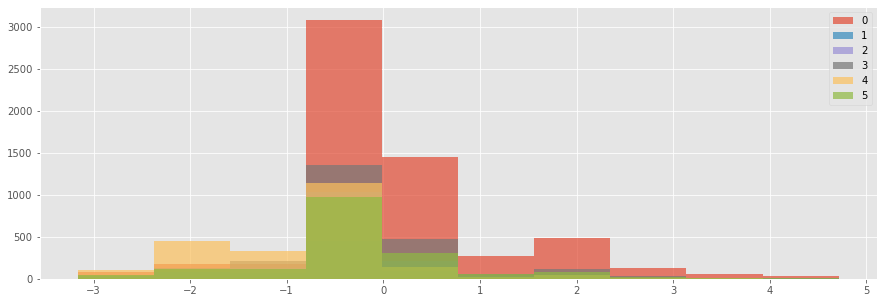

In [60]:
dummy_data.groupby("Cluster")["hours-per-week"].hist(legend=True, alpha=0.7,figsize=(15,5))
plt.show()

החלקוה שנוייה במחלוקת כי אומנם קבוצה 2 די מבודדת אך שאר הקבוצות די עולים אחד על השני